## Dataset Creation

#### Parsing XML Dataset to a Pandas Dataframe

In [1]:
import os
import xml.etree.ElementTree as et

import gensim.utils
import numpy as np
import pandas as pd

# Step 1: Traverse the directory structure
path = '2017'

train_folder = os.path.join(path, 'train')
test_folder = os.path.join(path, 'test')

# Step 2-4: Read XML files and load data into an appropriate format
def process_xml_files(folder_path, label=None):
    data = []

    for chunk_folder in os.listdir(folder_path):
        chunk_folder_path = os.path.join(folder_path, chunk_folder)
        if not os.path.isdir(chunk_folder_path):
            continue

        for xml_file in os.listdir(chunk_folder_path):
            xml_file_path = os.path.join(chunk_folder_path, xml_file)
            if not xml_file.endswith('.xml'):
                    continue

                # Step 3: Extract data from XML files
            tree = et.parse(xml_file_path)
            root = tree.getroot()

                # Extract the relevant data from the XML structure
                # Modify this part based on the XML structure of your dataset
            for writing in root.findall('WRITING'):
                text = writing.find('TEXT').text.strip()


                # Step 4: Load the data into an appropriate format
                data.append({'text': text, 'label': label})

    return data

# Process the train dataset
train_data_depression = process_xml_files(os.path.join(train_folder, 'positive_examples_anonymous_chunks'), label='depression')
train_data_non_depression = process_xml_files(os.path.join(train_folder, 'negative_examples_anonymous_chunks'), label='non-depression')
test_data = process_xml_files(os.path.join(test_folder))

# Combining the train datasets into a single DataFrame
train_df = pd.DataFrame(train_data_depression + train_data_non_depression)
test_df = pd.DataFrame(test_data)

## Cleaning and Preprocessing

In [2]:
'''

This stage will include the following :-

1) Cleaning of the Dataset

    1.1) Removal of rows having no data.

2) Processing of the Dataset

    2.1) Removal of Punctuations.
    2.2) Removal of HTML syntaxes and URLs
    2.3) Conversion of Texts to lowercase.
    2.4) Tokenization of the texts.
    2.5) Removal of stop words.
    2.6) Lemmatization.

3) Post Cleaning after preprocessing

'''


'\n\nThis stage will include the following :-\n\n1) Cleaning of the Dataset\n\n    1.1) Removal of rows having no data.\n\n2) Processing of the Dataset\n\n    2.1) Removal of Punctuations.\n    2.2) Removal of HTML syntaxes and URLs\n    2.3) Conversion of Texts to lowercase.\n    2.4) Tokenization of the texts.\n    2.5) Removal of stop words.\n    2.6) Lemmatization.\n\n3) Post Cleaning after preprocessing\n\n'

##### Checking dataframe

In [3]:
train_df

,text,label
0,The last line is pretty much the same as the f...,depression
1,On the flipside generic canned ravioli is just...,depression
2,At least make it illegal to perform on infants...,depression
3,I feel like I am the only who has never seen s...,depression
4,If anything it was an act of God for his chute...,depression
...,...,...
295018,"Yeah, I have known too many privates end up wi...",non-depression
295019,I am a soldier. I am regularly away from home ...,non-depression
295020,Please explain the button at /r/thebutton,non-depression
295021,Stars and Stripes is reporting the same thing ...,non-depression


In [4]:
train_df.shape

(295023, 2)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295023 entries, 0 to 295022
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    295023 non-null  object
 1   label   295023 non-null  object
dtypes: object(2)
memory usage: 4.5+ MB


In [6]:
train_df.describe()

,text,label
count,295023,295023
unique,204926,2
top,,non-depression
freq,84288,264172


##### Checking for rows having no texts or labels

In [7]:
blank_entries = (train_df["text"] == "").sum()
print(f'There are {blank_entries} rows with no text data in the dataframe')

There are 84288 rows with no text data in the dataframe


In [8]:
blank_entries = (train_df["label"] == "").sum()
print(f'There are {blank_entries} rows with no label data in the dataframe')

There are 0 rows with no label data in the dataframe


##### Removing rows with no texts

In [9]:
df = train_df.drop(train_df[train_df["text"] == ""].index)

In [10]:
blank_entries = (df["text"] == "").sum()
print(f'There are {blank_entries} rows with no text data in the dataframe')

There are 0 rows with no text data in the dataframe


In [11]:
df

,text,label
0,The last line is pretty much the same as the f...,depression
1,On the flipside generic canned ravioli is just...,depression
2,At least make it illegal to perform on infants...,depression
3,I feel like I am the only who has never seen s...,depression
4,If anything it was an act of God for his chute...,depression
...,...,...
295018,"Yeah, I have known too many privates end up wi...",non-depression
295019,I am a soldier. I am regularly away from home ...,non-depression
295020,Please explain the button at /r/thebutton,non-depression
295021,Stars and Stripes is reporting the same thing ...,non-depression


##### Removing Punctuations

In [12]:
import string
removables = string.punctuation # assigning removables to a string containing all the punctuations
def remove_punctuations(text):
    clean = ''.join([char for char in text if char not in removables])
    return clean
df['text'] = df['text'].apply(lambda x: remove_punctuations(x))

##### Removing html syntaxes and url

In [13]:
import re

def remove_html_and_urls(text):

    new_text = re.sub(r"<.*?>", "", text)
    new_text = re.sub(r"http\S+|www\S+", "", new_text)

    return new_text

df['text'] = df['text'].apply(lambda x: remove_html_and_urls(x))

##### Conversion of texts into lowercase

In [14]:
df['text'] = df['text'].str.lower()

##### Performing Tokenization of words

In [15]:
df['text'] = df['text'].apply(lambda x: x.split())

##### Removal of Stopwords

In [16]:
# from gensim.parsing.preprocessing import remove_stopword_tokens
# df['text'] = df['text'].apply(lambda x: remove_stopword_tokens(x))

In [17]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

df['text_without_stopwords'] = df['text'].apply(lambda x: ' '.join([word for word in x if word not in stopwords]))


##### Performing Lemmatization

In [18]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df['lemmatized_text'] = df['text_without_stopwords'].str.split().apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x]))

##### Post cleaning after preprocessing.

In [19]:
#checking for empty lists occuring as a result of preprocessing
empty_lists = df['text'].apply(lambda x: len(x) == 0).sum()
empty_lists1 = df['text'].apply(lambda x: len(x) == 0).sum()
empty_lists2 = df['text'].apply(lambda x: len(x) == 0).sum()
print(f'There are {empty_lists} empty lists in text column')
print(f'There are {empty_lists1} empty lists in text_without_stopwords column')
print(f'There are {empty_lists2} empty lists in lemmatized_text column')

There are 1696 empty lists in text column
There are 1696 empty lists in text_without_stopwords column
There are 1696 empty lists in lemmatized_text column


In [20]:
# Removal of empty lists
df = df[df['text'].apply(len) > 0]
df = df[df['text_without_stopwords'].apply(len) > 0]
df = df[df['lemmatized_text'].apply(len) > 0]

In [21]:
df

,text,label,text_without_stopwords,lemmatized_text
0,"[the, last, line, is, pretty, much, the, same,...",depression,last line pretty much first could course wasnt...,last line pretty much first could course wasnt...
1,"[on, the, flipside, generic, canned, ravioli, ...",depression,flipside generic canned ravioli good name bran...,flipside generic canned ravioli good name bran...
2,"[at, least, make, it, illegal, to, perform, on...",depression,least make illegal perform infants absolutely ...,least make illegal perform infant absolutely s...
3,"[i, feel, like, i, am, the, only, who, has, ne...",depression,feel like never seen sushi gas station,feel like never seen sushi gas station
4,"[if, anything, it, was, an, act, of, god, for,...",depression,anything act god chute open,anything act god chute open
...,...,...,...,...
295018,"[yeah, i, have, known, too, many, privates, en...",non-depression,yeah known many privates end stripper hooters ...,yeah known many private end stripper hooter gi...
295019,"[i, am, a, soldier, i, am, regularly, away, fr...",non-depression,soldier regularly away home weeks months even ...,soldier regularly away home week month even ye...
295020,"[please, explain, the, button, at, rthebutton]",non-depression,please explain button rthebutton,please explain button rthebutton
295021,"[stars, and, stripes, is, reporting, the, same...",non-depression,stars stripes reporting thing consider little ...,star stripe reporting thing consider little re...


In [22]:
# Label encoding the target variable with 0 and 1
df['label'] = df['label'].map({
    'non-depression':0,
    'depression':1
})

## Text Feature Extraction (Word2Vec)

In [23]:
from gensim.models import Word2Vec

# Word2Vec Feature Extraction
word2vec_model = Word2Vec(df.lemmatized_text.str.split(), window=5, min_count=1, workers=4)
word2vec_model.train(df.lemmatized_text.str.split(), total_examples=word2vec_model.corpus_count, epochs= 5 )

(18771316, 19342575)

In [24]:
import numpy as np

# Building a function to vectorize the list of words containing in the dataset from the vectors obtained from Word2Vec
def buildvector(text, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in text:
        try:
            vec += word2vec_model.wv[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [25]:
# Concantenating and scaling the vectors thus obtained.
# This essentially provides each sentence or list of words in the form of vectors of size 100

from sklearn.preprocessing import scale
vectors = np.concatenate([buildvector(x, word2vec_model.wv.vector_size) for x in df.lemmatized_text.str.split()])
vectors = scale(vectors)

## Model Training and Evaulation.

In [26]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Converting the vectors and labels to numpy arrays
X = np.array(vectors)
Y = np.array(df.label)

# Splitting the data into training and testing sets for the purpose of training
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(vectors, df.label, test_size=0.2, random_state=48)

# Instantiating the model
model = LogisticRegression()

# Setting the hyperparameters
#-----------------------------

C = 1.0
penalty = 'l2'
solver = 'sag'
max_iter = 1000

#-----------------------------

model.set_params(C=C, penalty=penalty, solver=solver, max_iter = max_iter)

# Training the logistic regression model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Calculating the accuracy obtained
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)
f1 = f1_score(Y_test, Y_pred)
print("f1 score:", f1)

Accuracy: 0.8648460225497031
f1 score: 0.004603399433427762


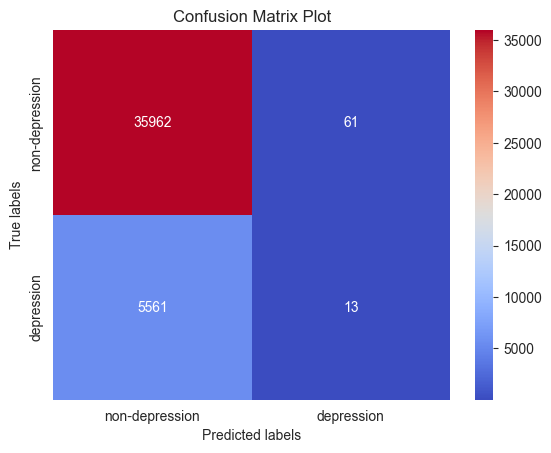

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test)
CM = confusion_matrix(Y_test, Y_pred)

# Creating a heatmap for the confusion matrix
labels = np.unique(Y_test)
sns.heatmap(CM, annot=True, cmap='coolwarm', fmt='d', xticklabels=('non-depression', 'depression'), yticklabels=('non-depression', 'depression'))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Plot')

plt.show()

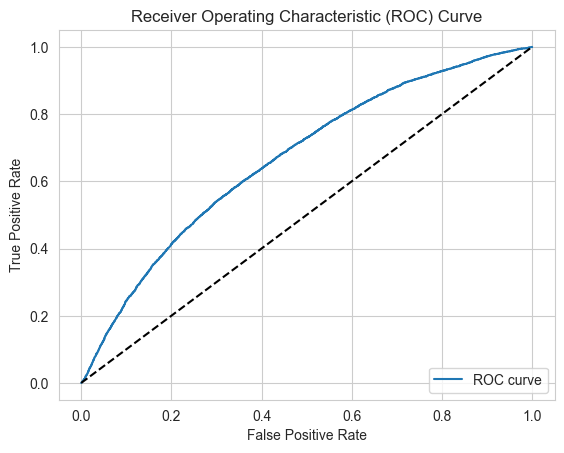

In [64]:
#Evaluation of the Model using ROC Curve

from sklearn.metrics import roc_curve

# Predicting probabilities on the test set
probs = model.predict_proba(X_test)
probs_positive = probs[:, 1]  # Considering only positive class probabilities

# Calculating the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, probs_positive)

# Plotting the ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')  # Plotting the random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Testing on a complete new dataset (test dataset)

In [27]:
test_df

,text,label
0,"""Kill Bill Siren"" was awesome. These seriously...",None
1,crazy bastard,None
2,What I hoped for this post: something other th...,None
3,"I didn't find this scene funny, but the fact t...",None
4,Bill from Kill Bill. Not saying the five point...,None
...,...,...
236366,I tend to get that with international students...,None
236367,"Mission accepted, I will report back to you!\n...",None
236368,Can confirm that we do this at Universities. H...,None
236369,"173lbs? Damn I wish so wasn't so lanky, I'd lo...",None


In [28]:
import gensim
test_df.text = test_df.text.apply(gensim.utils.simple_preprocess)

In [29]:
test_df

,text,label
0,"[kill, bill, siren, was, awesome, these, serio...",None
1,"[crazy, bastard]",None
2,"[what, hoped, for, this, post, something, othe...",None
3,"[didn, find, this, scene, funny, but, the, fac...",None
4,"[bill, from, kill, bill, not, saying, the, fiv...",None
...,...,...
236366,"[tend, to, get, that, with, international, stu...",None
236367,"[mission, accepted, will, report, back, to, yo...",None
236368,"[can, confirm, that, we, do, this, at, univers...",None
236369,"[lbs, damn, wish, so, wasn, so, lanky, look, g...",None


In [38]:
test_vectors = np.concatenate([buildvector(x, word2vec_model.wv.vector_size) for x in test_df.text])
test_vectors = scale(test_vectors)

In [39]:
test_vectors

array([[ 0.593506  ,  0.07685355, -0.01743866, ..., -0.10728977,
         1.04007564, -1.10483987],
       [ 0.23467322, -0.36538544, -0.29257648, ..., -0.48899067,
        -2.23696558,  0.56356398],
       [ 1.56615113,  0.79057342, -0.74843439, ..., -0.31784446,
         2.0679524 , -0.15527389],
       ...,
       [ 0.56916871,  0.57131207,  0.28079392, ..., -0.65417246,
         0.20943486, -0.29243674],
       [ 0.45995285,  0.14882305, -0.46893332, ..., -0.24959783,
        -0.73207365, -0.46111686],
       [ 1.10616388,  1.03748612, -0.70045138, ..., -0.46330461,
        -0.95483508,  0.05238985]])

In [40]:
predictions = model.predict(test_vectors)

In [41]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
# Calculating the value counts of predictions
prediction_counts = np.bincount(predictions)

# Printing the value counts
for label, count in enumerate(prediction_counts):
    print("Label", label, "Count", count)

Label 0 Count 235586
Label 1 Count 785
